# Heart Attack Risk Prediction Using Eval ML

Mahsa Mohammadkhorshiddoust


In [1]:
#Loading The Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\akbar\\Desktop\\Heart-Attack\\heart-data.csv", encoding = 'ANSI', engine='python')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df.drop(['oldpeak', 'slp', 'thall'], axis = 1)
df.shape

(303, 11)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

As there are no null values in our dataset, we can go on analysing the data.

Here are the correlation between features which indicates how are features are correlated.

In [5]:
correlation = df.corr()
correlation

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


Lets now visualize this correlation to dive deep into the analysis!

As we can see, negative values indicate the lighter colors, while the darker colores represent the strong relationship between features.


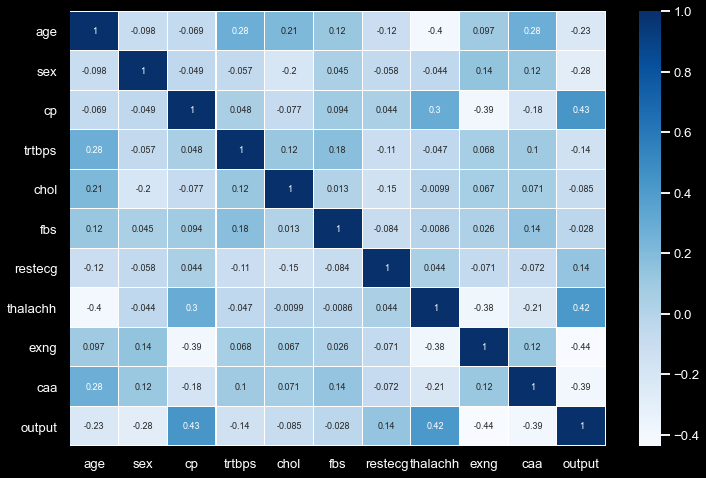

In [6]:
sns.set(style="darkgrid", context="talk", font_scale=0.8)
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5,'axes.facecolor':'black','axes.grid' : True,'grid.color': '1'})
plt.figure(figsize = (12,8))

sns.heatmap(correlation, linewidths=.1, annot=True, annot_kws={"size":9}, cmap= "Blues")
print("As we can see, negative values indicate the lighter colors, while the darker colores represent the strong relationship between features.")

This plot shows that between the ages of 54-58, the risk of heart attack is at it's highest.


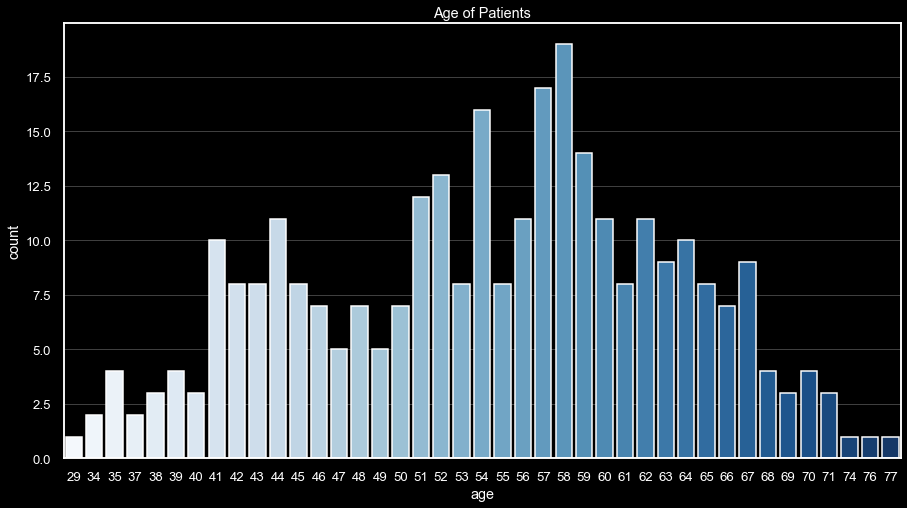

In [7]:
sns.set(style="darkgrid", context="talk", font_scale=0.8)
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5,'axes.facecolor':'black','axes.grid' : True,'grid.color': '1'})
plt.figure(figsize = (15,8))

plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x= 'age', data = df, palette="Blues")

print("This plot shows that between the ages of 54-58, the risk of heart attack is at it's highest.")

This plot shows that men carry the higher risk of heart attack.


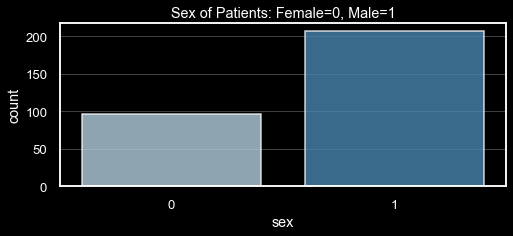

In [8]:
sns.set(style="darkgrid", context="talk", font_scale=0.8)
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5,'axes.facecolor':'black','axes.grid' : True,'grid.color': '1'})
plt.figure(figsize = (8,3))

plt.title("Sex of Patients: Female=0, Male=1")
plt.xlabel("Sex")
sns.countplot(x= 'sex', data = df, palette="Blues", alpha=0.8)

print("This plot shows that men carry the higher risk of heart attack.")

In [9]:
print("Now lets see the frequency of unique chest pain values by creating a new dataframe and renaming the indexes to the types of chest pains.")
ChestPain = df['cp'].value_counts().reset_index()
ChestPain['index'][3] = 'Asymptomatic'
ChestPain['index'][2] = 'Non-Anginal'
ChestPain['index'][1] = 'Attypical Anigma'
ChestPain['index'][0] = 'Typical Anigma'
ChestPain

Now lets see the frequency of unique chest pain values by creating a new dataframe and renaming the indexes to the types of chest pains.


,index,cp
0,Typical Anigma,143
1,Attypical Anigma,87
2,Non-Anginal,50
3,Asymptomatic,23


As we can see, Typical Anigma is the most common type of chest pain among pateints.


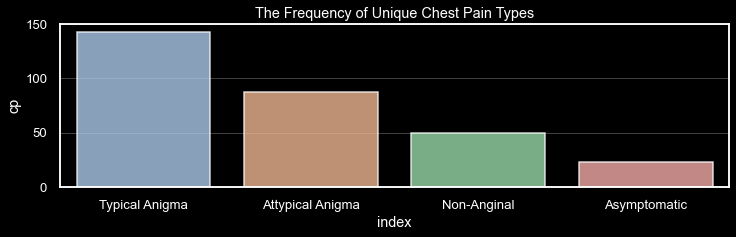

In [10]:
sns.set(style="darkgrid", context="talk", font_scale=0.8)
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5,'axes.facecolor':'black','axes.grid' : True,'grid.color': '1'})
plt.figure(figsize = (12,3))
plt.title("The Frequency of Unique Chest Pain Types")
sns.barplot(x= ChestPain['index'], y = ChestPain['cp'], palette="pastel", alpha= 0.8)

print("As we can see, Typical Anigma is the most common type of chest pain among pateints.")

In [11]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data['index'][0] = 'Normal'
ecg_data['index'][1] = 'Having ST-T Wave Abnormality'
ecg_data['index'][2] = 'Showing Probable or Definite Left ventricular Hypertrophy by Estes'
ecg_data

,index,restecg
0,Normal,152
1,Having ST-T Wave Abnormality,147
2,Showing Probable or Definite Left ventricular ...,4


<AxesSubplot:title={'center':'ECG Data of Patients'}, xlabel='index', ylabel='restecg'>

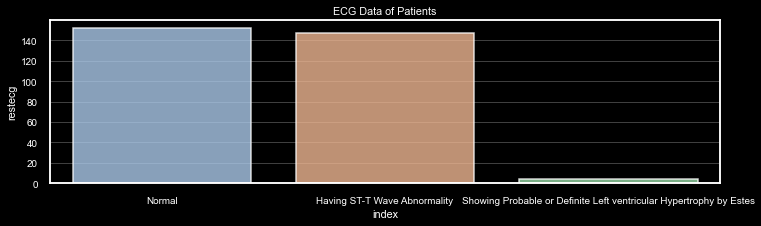

In [12]:
sns.set(style="darkgrid", context="talk", font_scale=0.6)
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5,'axes.facecolor':'black','axes.grid' : True,'grid.color': '1'})
plt.figure(figsize = (12,3))
plt.title("ECG Data of Patients")
sns.barplot(x= ecg_data['index'], y = ecg_data['restecg'], palette="pastel", alpha= 0.8)


<Figure size 1080x360 with 0 Axes>

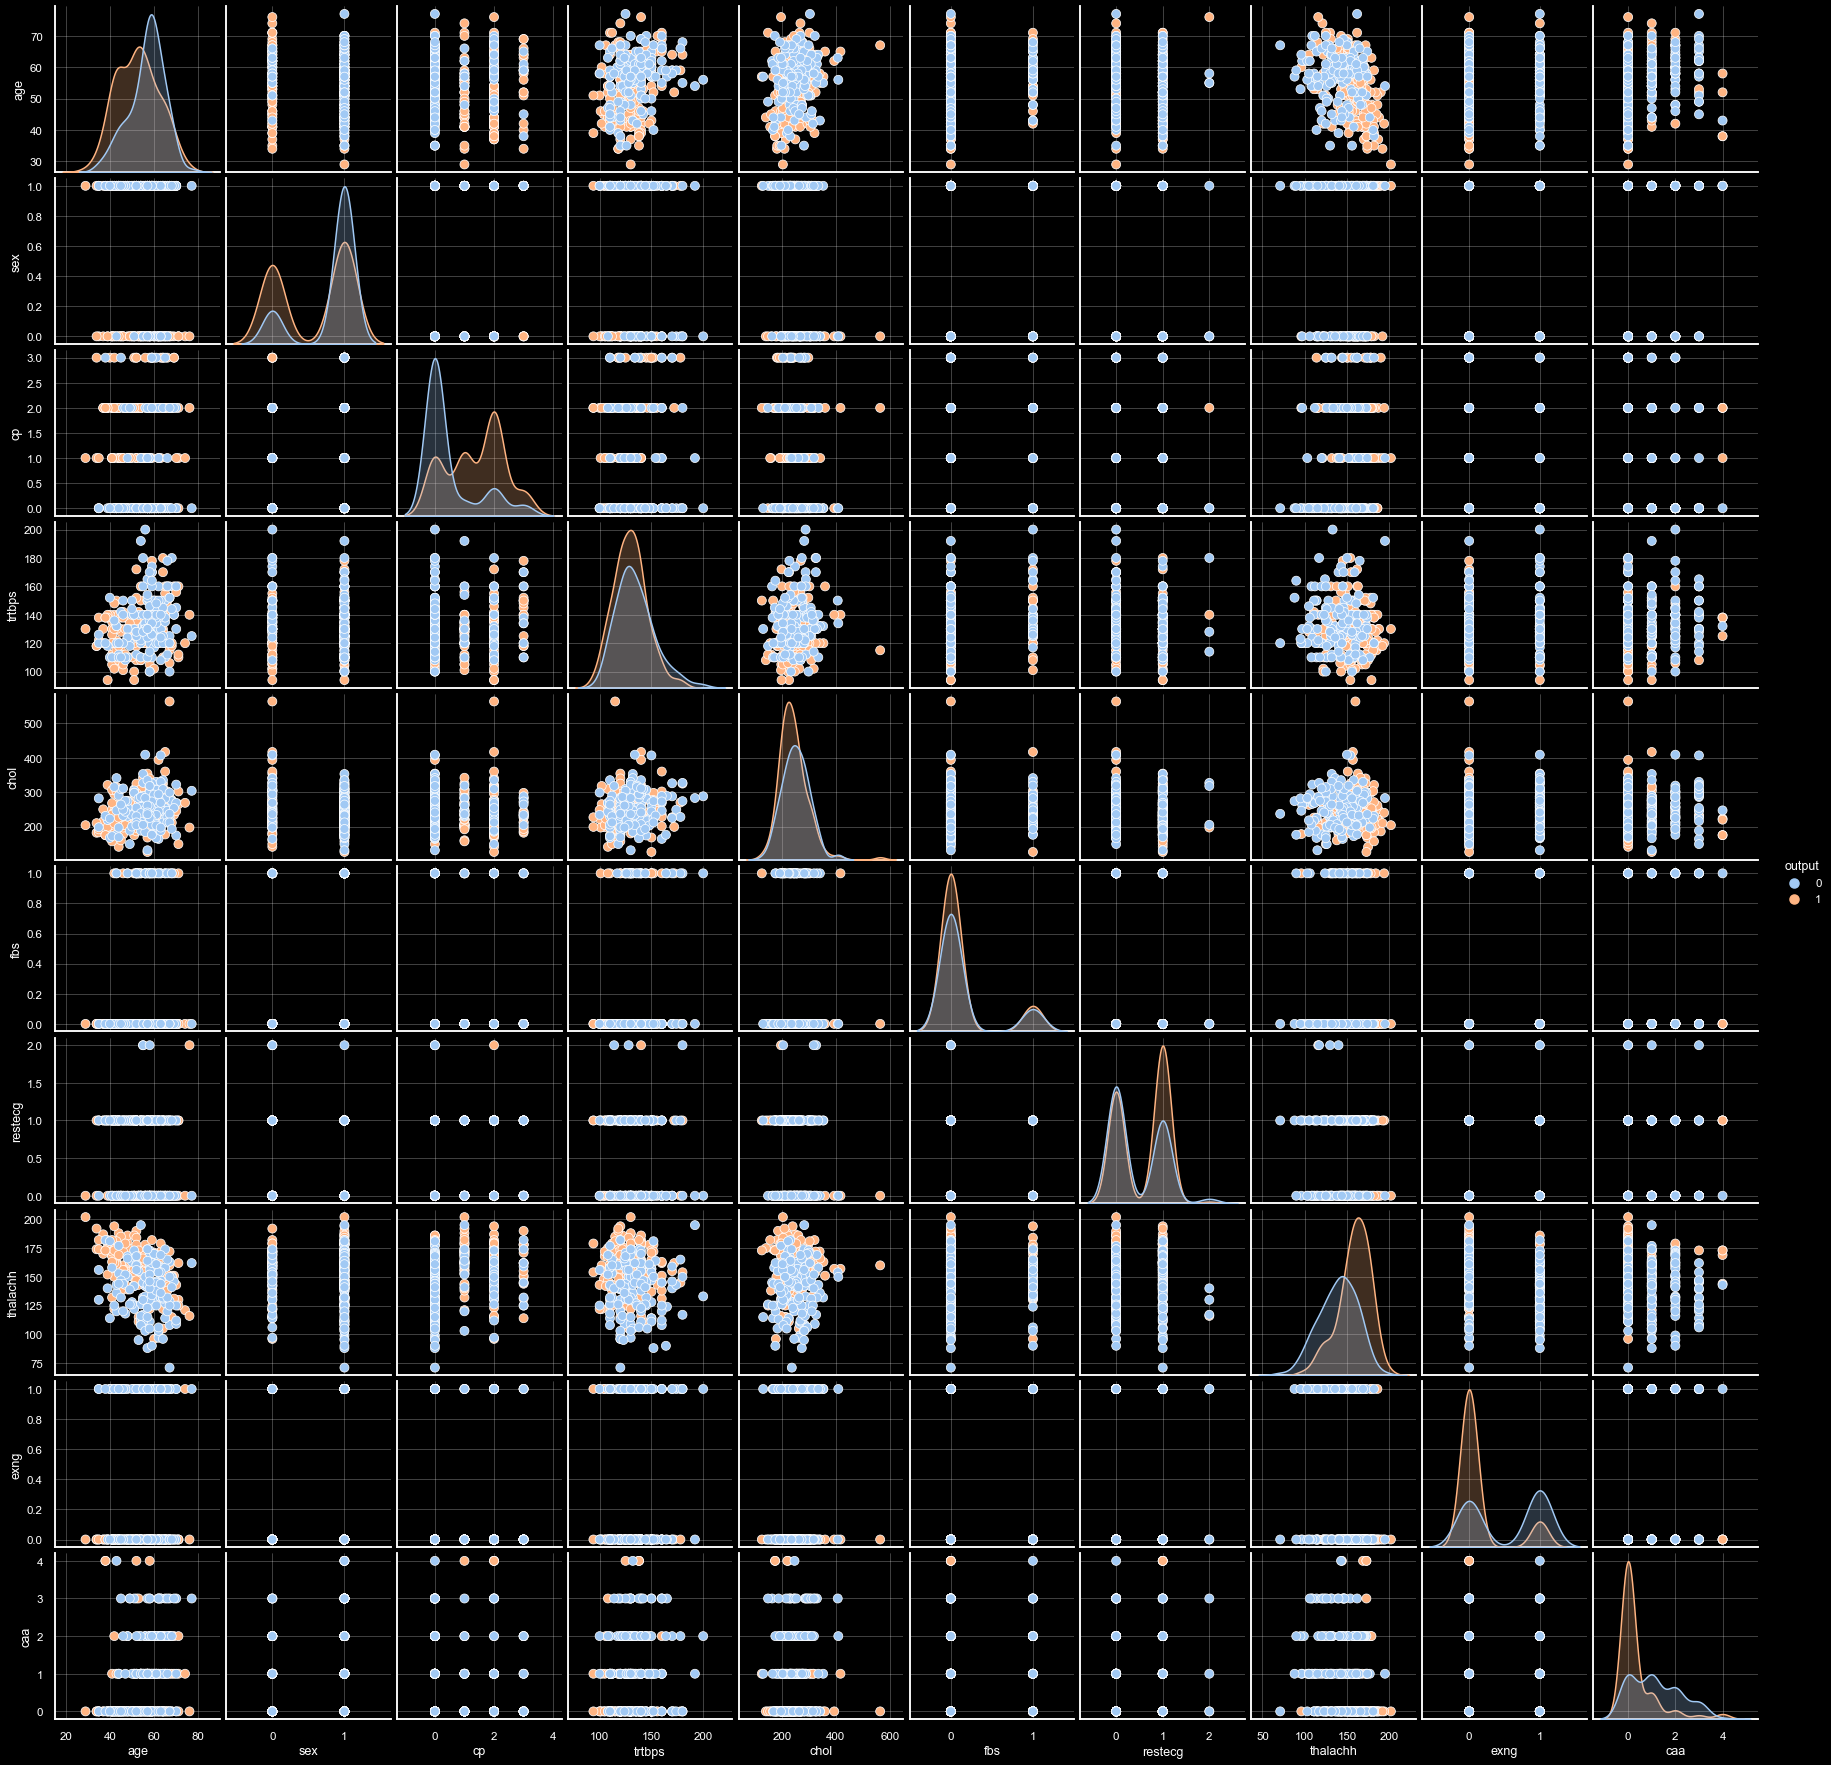

In [13]:
sns.set(style="darkgrid", context="talk", font_scale=0.7)
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5,'axes.facecolor':'black','axes.grid' : True,'grid.color': '1'})
plt.figure(figsize = (15,5))
sns.pairplot(df, hue='output', data=df, palette="pastel")

C:\Users\akbar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akbar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

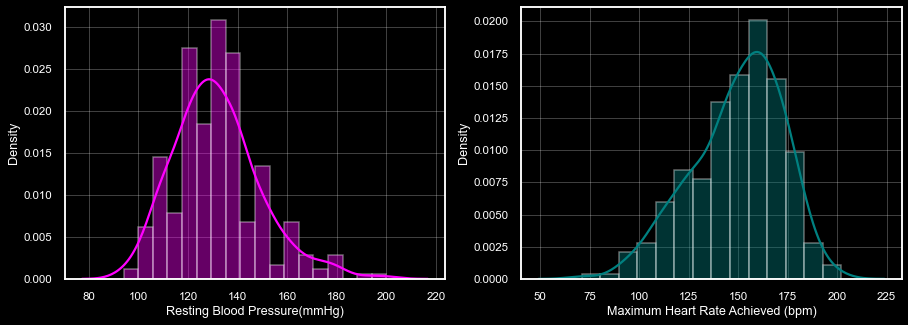

In [14]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure(mmHg)")
plt.subplot(1, 2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")


C:\Users\akbar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cholestrol')

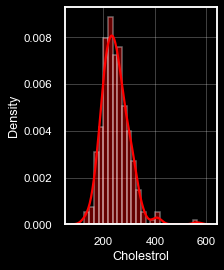

In [15]:
plt.subplot(1, 2,1)
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
df = scale.transform(df)
df = pd.DataFrame(df, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa', 'output'])
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


# We will be using the following models to predict the risk of heart attack in patients:


Logistic Regression

Decision Tree

Random Forest

K Nearest Neighbour

SVM


## Determining X and Y Values

In [17]:
x = df.iloc[:, :-1]
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429


In [18]:
y = df.iloc[:,-1:]
y.head()

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529


## Splitting Data Into Training and Testing

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=101)

## Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
encoded_y= lbl.fit_transform(y_train)
logreg= LogisticRegression()
logreg.fit(x_train, encoded_y)

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
encoded_ytest = lbl.fit_transform(y_test)
Y_pred1= logreg.predict(x_test)
Y_pred1

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [22]:
lr_conf_matrix= confusion_matrix(encoded_ytest, Y_pred1)
lr_acc_score= accuracy_score(encoded_ytest, Y_pred1)
lr_conf_matrix

array([[35,  9],
       [ 4, 43]], dtype=int64)

In [23]:
print(lr_acc_score*100, "%")

85.71428571428571 %


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, encoded_y)
ypred2= tree.predict(x_test)
encoded_ytest = lbl.fit_transform(y_test)

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
tree_conf_matrix= confusion_matrix(encoded_ytest, ypred2)
tree_acc_score= accuracy_score(encoded_ytest, ypred2)
tree_conf_matrix

array([[26, 18],
       [10, 37]], dtype=int64)

In [26]:
print(tree_acc_score*100, "%")

69.23076923076923 %


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, encoded_y)
ypred3= rf.predict(x_test)
encoded_ytest = lbl.fit_transform(y_test)

rf_conf_matrix= confusion_matrix(encoded_ytest, ypred3)
rf_acc_score= accuracy_score(encoded_ytest, ypred3)
rf_conf_matrix

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[30, 14],
       [ 7, 40]], dtype=int64)

In [28]:
print(rf_acc_score*100, "%")

76.92307692307693 %


## K Nearest Neighbour

In [29]:
from sklearn.neighbors import KNeighborsClassifier

error_rate= []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

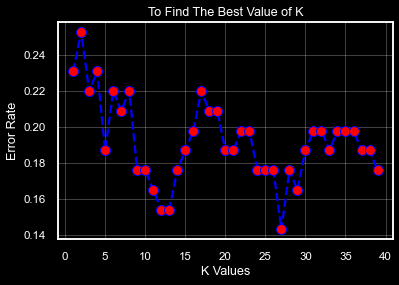

In [30]:
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.xlabel("K Values")
plt.ylabel("Error Rate")
plt.title("To Find The Best Value of K")
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, encoded_y)
ypred4= knn.predict(x_test)
encoded_ytest = lbl.fit_transform(y_test)

knn_conf_matrix= confusion_matrix(encoded_ytest, ypred4)
knn_acc_score= accuracy_score(encoded_ytest, ypred4)
knn_conf_matrix

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[35,  9],
       [ 5, 42]], dtype=int64)

In [32]:
print(knn_acc_score*100, "%")

84.61538461538461 %


## Support Vector Machine

In [33]:
from sklearn import svm
svm = svm.SVC()

svm.fit(x_train, encoded_y)
ypred5= svm.predict(x_test)
encoded_ytest = lbl.fit_transform(y_test)

svm_conf_matrix= confusion_matrix(encoded_ytest, ypred5)
svm_acc_score= accuracy_score(encoded_ytest, ypred5)
svm_conf_matrix

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[34, 10],
       [ 8, 39]], dtype=int64)

In [34]:
print(svm_acc_score*100, "%")

80.21978021978022 %


## Comparing The Accuracy of The Models

In [35]:
model_acc = pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 'K Nearest Neighbor', 'SVM'], 'Accuracy': [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [36]:
model_acc = model_acc.sort_values(by=['Accuracy'], ascending = False)

In [37]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
4,SVM,80.219780
2,Random Forest,76.923077
1,Decision Tree,69.230769


As shown on the table above, Logistic Regression has the highest accuracy in predicting the risk of heart attack among patients

## AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(base_estimator = svm, n_estimators=100, algorithm='SAMME', learning_rate=0.01, random_state=0)

In [39]:
adab.fit(x_train, encoded_y)
ypred6= adab.predict(x_test)
encoded_ytest = lbl.fit_transform(y_test)

adab_conf_matrix= confusion_matrix(encoded_ytest, ypred6)
adab_acc_score= accuracy_score(encoded_ytest, ypred6)
adab_conf_matrix

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[ 0, 44],
       [ 0, 47]], dtype=int64)

In [40]:
print(adab_acc_score*100, "%")

51.64835164835166 %


## Prediction Using EvalML

In [41]:
import evalml

In [42]:
df = pd.read_csv("C:\\Users\\akbar\\Desktop\\Heart-Attack\\heart-data.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
X = df.iloc[:,:-1]
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [44]:
y = df.iloc[:,-1:]
y= lbl.fit_transform(y)
y

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')

In [79]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [80]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')

automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: decision_tree, linear_model, catboost, random_forest, xgboost, lightgbm, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 15.699

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.689
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 4.546
	High coefficient of variation (cv >= 0.2) within cross validation scores.
	Decision Tree Classifier w/ Imputer may not perform as estimated on unseen data.
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.411
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.501
Logistic Regression Classifier w/ Imputer + Standa

C:\Users\akbar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:21:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akbar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:21:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akbar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:21:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.517
	High coefficient of variation (cv >= 0.2) within cross validation scores.
	XGBoost Classifier w/ Imputer may not perform as estimated on unseen data.
Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.409
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.642

Search finished after 01:10            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline Log Loss Binary: 0.409273


In [48]:
automl.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,0.409273,0.049547,0.372040,97.393029,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,0.410970,0.026978,0.392403,97.382216,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,5,Logistic Regression Classifier w/ Imputer + St...,0.438590,0.079628,0.377582,97.206285,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,4,LightGBM Classifier w/ Imputer,0.500958,0.069096,0.443723,96.809012,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,XGBoost Classifier w/ Imputer,0.517132,0.121242,0.427519,96.705989,True,{'Imputer': {'categorical_impute_strategy': 'm...
5,8,CatBoost Classifier w/ Imputer,0.642257,0.001598,0.641090,95.908973,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,1,Elastic Net Classifier w/ Imputer + Standard S...,0.689468,0.000869,0.690335,95.608247,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,2,Decision Tree Classifier w/ Imputer,4.546383,2.245911,3.944497,71.040602,True,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,15.699161,0.135405,15.777337,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [49]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph=[Imputer, ExtraTreesClassifier], parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [50]:
best_pipeline = automl.best_pipeline

In [51]:
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 6.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.372       0.753 0.939      0.854 0.891                     0.871            0.877                           0.476        161           81
1                      0.390       0.581 0.912

In [52]:
best_pipeline.score(X_test, y_test, objectives=["auc", "f1", "Precision","Recall"])

OrderedDict([('AUC', 0.9004329004329004),
             ('F1', 0.8405797101449276),
             ('Precision', 0.8055555555555556),
             ('Recall', 0.8787878787878788)])

In [53]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: decision_tree, linear_model, catboost, random_forest, xgboost, lightgbm, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.837
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.897
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.870
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.880


C:\Users\akbar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:59:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akbar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:59:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akbar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:59:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.872
Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.902
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.889

Search finished after 00:59            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline AUC: 0.902260


In [54]:
automl_auc.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,0.902260,0.042749,0.939189,40.226021,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,0.896641,0.024824,0.909091,39.664096,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,8,CatBoost Classifier w/ Imputer,0.889145,0.032924,0.919533,38.914483,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,Logistic Regression Classifier w/ Imputer + St...,0.879999,0.036021,0.906634,37.999932,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,XGBoost Classifier w/ Imputer,0.871866,0.042693,0.894963,37.186618,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,4,LightGBM Classifier w/ Imputer,0.869785,0.025928,0.875307,36.978456,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,2,Decision Tree Classifier w/ Imputer,0.836956,0.085222,0.858415,33.695627,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,0,Mode Baseline Binary Classification Pipeline,0.500000,0.000000,0.500000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}
8,1,Elastic Net Classifier w/ Imputer + Standard S...,0.500000,0.000000,0.500000,0.000000,False,{'Imputer': {'categorical_impute_strategy': 'm...


In [55]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]['id'])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 5.9 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.939 0.891      0.854        161           81
1           0.912 0.800      0.829        161           81
2           0.855 0.817      0.776        162           80
mean        0.902 0.836      0.820          -            -
std         0.043 0.049      0.040          -            -
coef of var 0.047 

In [56]:
best_pipeline_auc = automl_auc.best_pipeline

In [57]:
best_pipeline.score(X_test, y_test, objectives=["auc"])

OrderedDict([('AUC', 0.9004329004329004)])

In [58]:
best_pipeline_auc.save("model.pkl")

In [59]:
final_model = automl.load('model.pkl')

In [68]:
final_model.predict_proba(X_test)

,Physical Type,Logical Type,Semantic Tag(s)
Data Column,,,
0,float64,Double,['numeric']
1,float64,Double,['numeric']
